In [1]:
import numpy as np
import pandas as pd

import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
pd.options.display.max_rows = 222
pd.set_option("display.max_columns", 26)

In [99]:
df_train = pd.read_csv(
    "geekbrains-competitive-data-analysis/train.csv"
)

df_test = pd.read_csv(
    "geekbrains-competitive-data-analysis/test.csv"
)

print("gf_train.shape = {} rows, {} cols".format(*df_train.shape))
print("df_test.shape = {} rows, {} cols".format(*df_test.shape))

gf_train.shape = 110093 rows, 3 cols
df_test.shape = 165141 rows, 2 cols


In [4]:
#!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!
# история предыдущих заявок клиента.
df_applications_history = pd.read_csv(
    "geekbrains-competitive-data-analysis/applications_history.csv"
)

print("applications_history.shape = {} rows, {} cols".format(*df_applications_history.shape))
df_applications_history.head()

applications_history.shape = 1670214 rows, 26 cols


,PREV_APPLICATION_NUMBER,APPLICATION_NUMBER,NAME_CONTRACT_TYPE,AMOUNT_ANNUITY,AMT_APPLICATION,AMOUNT_CREDIT,AMOUNT_PAYMENT,AMOUNT_GOODS_PAYMENT,NAME_CONTRACT_STATUS,DAYS_DECISION,NAME_PAYMENT_TYPE,CODE_REJECT_REASON,NAME_TYPE_SUITE,NAME_CLIENT_TYPE,NAME_GOODS_CATEGORY,NAME_PORTFOLIO,NAME_PRODUCT_TYPE,SELLERPLACE_AREA,CNT_PAYMENT,NAME_YIELD_GROUP,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
0,49298709,123595216,NaN,1730.430,17145.0,17145.0,0.0,17145.0,Approved,73,Cash through the bank,XAP,NaN,Repeater,Mobile,POS,XNA,35,12.0,middle,365243.0,42.0,300.0,42.0,37.0,0.0
1,50070639,123431468,Cash,25188.615,607500.0,679671.0,NaN,607500.0,Approved,164,XNA,XAP,Unaccompanied,Repeater,XNA,Cash,x-sell,-1,36.0,low_action,365243.0,134.0,916.0,365243.0,365243.0,1.0
2,49791680,123445379,Cash,15060.735,112500.0,136444.5,NaN,112500.0,Approved,301,Cash through the bank,XAP,"Spouse, partner",Repeater,XNA,Cash,x-sell,-1,12.0,high,365243.0,271.0,59.0,365243.0,365243.0,1.0
3,50087457,123499497,Cash,47041.335,450000.0,470790.0,NaN,450000.0,Approved,512,Cash through the bank,XAP,NaN,Repeater,XNA,Cash,x-sell,-1,12.0,middle,365243.0,482.0,152.0,182.0,177.0,1.0
4,49052479,123525393,Cash,31924.395,337500.0,404055.0,NaN,337500.0,Refused,781,Cash through the bank,HC,NaN,Repeater,XNA,Cash,walk-in,-1,24.0,high,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
# клиентский профиль, некоторые знания, которые есть у компании о клиенте;
df_client_profile = pd.read_csv(
    "geekbrains-competitive-data-analysis/client_profile.csv"
)

print("client_profile.shape = {} rows, {} cols".format(*df_client_profile.shape))
df_client_profile.head()

client_profile.shape = 250000 rows, 24 cols


,APPLICATION_NUMBER,GENDER,CHILDRENS,TOTAL_SALARY,AMOUNT_CREDIT,AMOUNT_ANNUITY,EDUCATION_LEVEL,FAMILY_STATUS,REGION_POPULATION,AGE,DAYS_ON_LAST_JOB,OWN_CAR_AGE,FLAG_PHONE,FLAG_EMAIL,FAMILY_SIZE,EXTERNAL_SCORING_RATING_1,EXTERNAL_SCORING_RATING_2,EXTERNAL_SCORING_RATING_3,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,123666076,F,0,157500.0,270000.0,13500.0,Incomplete higher,Civil marriage,0.008068,8560,1549,NaN,1,0,2.0,0.329471,0.236315,0.678568,0.0,0.0,0.0,0.0,1.0,2.0
1,123423688,F,0,270000.0,536917.5,28467.0,Secondary / secondary special,Married,0.020246,23187,365243,NaN,0,0,2.0,NaN,0.442295,0.802745,0.0,0.0,0.0,0.0,1.0,1.0
2,123501780,M,1,427500.0,239850.0,23850.0,Incomplete higher,Married,0.072508,14387,326,18.0,0,0,3.0,0.409017,0.738159,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,123588799,M,0,112500.0,254700.0,17149.5,Secondary / secondary special,Married,0.019101,14273,1726,12.0,0,0,2.0,NaN,0.308994,0.590233,0.0,0.0,0.0,0.0,0.0,3.0
4,123647485,M,0,130500.0,614574.0,19822.5,Lower secondary,Married,0.022625,22954,365243,NaN,0,0,2.0,NaN,0.739408,0.156640,0.0,0.0,1.0,0.0,0.0,6.0


In [6]:
#!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!
# данные БКИ о предыдущих кредитах клиента;
df_bki = pd.read_csv(
    "geekbrains-competitive-data-analysis/bki.csv"
)

print("bki.shape = {} rows, {} cols".format(*df_bki.shape))
df_bki.head()

bki.shape = 945234 rows, 17 cols


,APPLICATION_NUMBER,BUREAU_ID,CREDIT_ACTIVE,CREDIT_CURRENCY,DAYS_CREDIT,CREDIT_DAY_OVERDUE,DAYS_CREDIT_ENDDATE,DAYS_ENDDATE_FACT,AMT_CREDIT_MAX_OVERDUE,CNT_CREDIT_PROLONG,AMT_CREDIT_SUM,AMT_CREDIT_SUM_DEBT,AMT_CREDIT_SUM_LIMIT,AMT_CREDIT_SUM_OVERDUE,CREDIT_TYPE,DAYS_CREDIT_UPDATE,AMT_ANNUITY
0,123538884,5223613,Active,currency 1,718.0,0,377.0,NaN,19386.81,0,675000.00,320265.495,0.0,0.0,Consumer credit,39.0,NaN
1,123436670,6207544,Closed,currency 1,696.0,0,511.0,511.0,0.00,0,93111.66,0.000,0.0,0.0,Consumer credit,505.0,NaN
2,123589020,6326395,Closed,currency 1,165.0,0,149.0,160.0,NaN,0,36000.00,0.000,0.0,0.0,Consumer credit,150.0,0.0
3,123494590,6606618,Active,currency 1,55.0,0,310.0,NaN,NaN,0,38664.00,37858.500,NaN,0.0,Consumer credit,15.0,NaN
4,123446603,5046832,Active,currency 1,358.0,0,35.0,NaN,NaN,0,67500.00,0.000,0.0,0.0,Credit card,116.0,NaN


In [7]:
#!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!
# история платежей клиента;
df_payments = pd.read_csv(
    "geekbrains-competitive-data-analysis/payments.csv"
)

print("payments.shape = {} rows, {} cols".format(*df_payments.shape))
df_payments.head()

payments.shape = 1023932 rows, 8 cols


,PREV_APPLICATION_NUMBER,APPLICATION_NUMBER,NUM_INSTALMENT_VERSION,NUM_INSTALMENT_NUMBER,DAYS_INSTALMENT,DAYS_ENTRY_PAYMENT,AMT_INSTALMENT,AMT_PAYMENT
0,49011181,123664960,1.0,5,1002.0,1015.0,12156.615,12156.615
1,48683432,123497205,1.0,13,442.0,432.0,18392.535,10047.645
2,48652024,123749925,1.0,10,8.0,23.0,5499.945,5499.945
3,48398897,123550846,0.0,82,398.0,398.0,7082.145,7082.145
4,49867197,123562174,0.0,63,1359.0,1359.0,156.735,156.735


In [8]:
df_sample_submit = pd.read_csv(
    "geekbrains-competitive-data-analysis/sample_submit.csv"
)

print("sample_submit.shape = {} rows, {} cols".format(*df_sample_submit.shape))
df_sample_submit.head()

sample_submit.shape = 165141 rows, 2 cols


,APPLICATION_NUMBER,TARGET
0,123724268,0
1,123456549,0
2,123428178,0
3,123619984,0
4,123671104,0


In [9]:
len(set(df_sample_submit['APPLICATION_NUMBER']) & set(df_train['APPLICATION_NUMBER']))

0

# история предыдущих заявок клиента.
df_applications_history

In [10]:
df_applications_history.head(10)

,PREV_APPLICATION_NUMBER,APPLICATION_NUMBER,NAME_CONTRACT_TYPE,AMOUNT_ANNUITY,AMT_APPLICATION,AMOUNT_CREDIT,AMOUNT_PAYMENT,AMOUNT_GOODS_PAYMENT,NAME_CONTRACT_STATUS,DAYS_DECISION,NAME_PAYMENT_TYPE,CODE_REJECT_REASON,NAME_TYPE_SUITE,NAME_CLIENT_TYPE,NAME_GOODS_CATEGORY,NAME_PORTFOLIO,NAME_PRODUCT_TYPE,SELLERPLACE_AREA,CNT_PAYMENT,NAME_YIELD_GROUP,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
0,49298709,123595216,NaN,1730.430,17145.0,17145.0,0.0,17145.0,Approved,73,Cash through the bank,XAP,NaN,Repeater,Mobile,POS,XNA,35,12.0,middle,365243.0,42.0,300.0,42.0,37.0,0.0
1,50070639,123431468,Cash,25188.615,607500.0,679671.0,NaN,607500.0,Approved,164,XNA,XAP,Unaccompanied,Repeater,XNA,Cash,x-sell,-1,36.0,low_action,365243.0,134.0,916.0,365243.0,365243.0,1.0
2,49791680,123445379,Cash,15060.735,112500.0,136444.5,NaN,112500.0,Approved,301,Cash through the bank,XAP,"Spouse, partner",Repeater,XNA,Cash,x-sell,-1,12.0,high,365243.0,271.0,59.0,365243.0,365243.0,1.0
3,50087457,123499497,Cash,47041.335,450000.0,470790.0,NaN,450000.0,Approved,512,Cash through the bank,XAP,NaN,Repeater,XNA,Cash,x-sell,-1,12.0,middle,365243.0,482.0,152.0,182.0,177.0,1.0
4,49052479,123525393,Cash,31924.395,337500.0,404055.0,NaN,337500.0,Refused,781,Cash through the bank,HC,NaN,Repeater,XNA,Cash,walk-in,-1,24.0,high,NaN,NaN,NaN,NaN,NaN,NaN
5,48651745,123522722,Cash,23703.930,315000.0,340573.5,NaN,315000.0,Approved,684,Cash through the bank,XAP,Family,Repeater,XNA,Cash,x-sell,-1,18.0,low_normal,365243.0,654.0,144.0,144.0,137.0,1.0
6,49583432,123499043,Cash,NaN,0.0,0.0,NaN,NaN,Canceled,14,XNA,XAP,NaN,Repeater,XNA,XNA,XNA,-1,NaN,XNA,NaN,NaN,NaN,NaN,NaN,NaN
7,48924925,123619638,Cash,NaN,0.0,0.0,NaN,NaN,Canceled,21,XNA,XAP,NaN,Repeater,XNA,XNA,XNA,-1,NaN,XNA,NaN,NaN,NaN,NaN,NaN,NaN
8,49635777,123665631,Cash,NaN,0.0,0.0,NaN,NaN,Canceled,386,XNA,XAP,NaN,Repeater,XNA,XNA,XNA,-1,NaN,XNA,NaN,NaN,NaN,NaN,NaN,NaN
9,49847661,123657688,Cash,NaN,0.0,0.0,NaN,NaN,Canceled,57,XNA,XAP,NaN,Repeater,XNA,XNA,XNA,-1,NaN,XNA,NaN,NaN,NaN,NaN,NaN,NaN


In [11]:
df_applications_history.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1670214 entries, 0 to 1670213
Data columns (total 26 columns):
 #   Column                     Non-Null Count    Dtype  
---  ------                     --------------    -----  
 0   PREV_APPLICATION_NUMBER    1670214 non-null  int64  
 1   APPLICATION_NUMBER         1670214 non-null  int64  
 2   NAME_CONTRACT_TYPE         940717 non-null   object 
 3   AMOUNT_ANNUITY             1297979 non-null  float64
 4   AMT_APPLICATION            1670214 non-null  float64
 5   AMOUNT_CREDIT              1670213 non-null  float64
 6   AMOUNT_PAYMENT             774370 non-null   float64
 7   AMOUNT_GOODS_PAYMENT       1284699 non-null  float64
 8   NAME_CONTRACT_STATUS       1670214 non-null  object 
 9   DAYS_DECISION              1670214 non-null  int64  
 10  NAME_PAYMENT_TYPE          1670214 non-null  object 
 11  CODE_REJECT_REASON         1670214 non-null  object 
 12  NAME_TYPE_SUITE            849809 non-null   object 
 13  NAME_CLIENT_

In [12]:
#df_applications_history['AMOUNT_ANNUITY'].fillna(0)

In [13]:
df_applications_history.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1670214 entries, 0 to 1670213
Data columns (total 26 columns):
 #   Column                     Non-Null Count    Dtype  
---  ------                     --------------    -----  
 0   PREV_APPLICATION_NUMBER    1670214 non-null  int64  
 1   APPLICATION_NUMBER         1670214 non-null  int64  
 2   NAME_CONTRACT_TYPE         940717 non-null   object 
 3   AMOUNT_ANNUITY             1297979 non-null  float64
 4   AMT_APPLICATION            1670214 non-null  float64
 5   AMOUNT_CREDIT              1670213 non-null  float64
 6   AMOUNT_PAYMENT             774370 non-null   float64
 7   AMOUNT_GOODS_PAYMENT       1284699 non-null  float64
 8   NAME_CONTRACT_STATUS       1670214 non-null  object 
 9   DAYS_DECISION              1670214 non-null  int64  
 10  NAME_PAYMENT_TYPE          1670214 non-null  object 
 11  CODE_REJECT_REASON         1670214 non-null  object 
 12  NAME_TYPE_SUITE            849809 non-null   object 
 13  NAME_CLIENT_

In [14]:
df_applications_history.select_dtypes(include=[np.number])['APPLICATION_NUMBER'].quantile(.99)


123776124.0

In [15]:
def numeric_preprocessing(data: pd.DataFrame) -> pd.DataFrame:
    numeric_feature = data.select_dtypes(include=[np.number]).columns
    
    for feature in numeric_feature:
        max_ = data[feature].quantile(.99)
        min_ = data[feature].quantile(.01)
        data.loc[data[feature] > max_, [feature]] = max_
        data.loc[data[feature] < min_, [feature]] = min_
        
    return data
    

def create_dummie(data: pd.DataFrame) -> pd.DataFrame:
    """
    

    """
    numeric_feature = data.select_dtypes(include=[np.number]).columns

    сategorical_feature = list(set(data.columns) - set(numeric_feature))

    data_copy = data.copy()

    for i in range(len(сategorical_feature)):
        print(f'feature {сategorical_feature[i]}')
        сategorical_values = data_copy[сategorical_feature[i]].unique()
        print(f'сategorical values {сategorical_values}')

        for cat in сategorical_values:
            dummie_feature_name = f'{сategorical_feature[i]}_{cat}'

            if str(cat) != 'nan':
                print(f'    dummie feature name: {dummie_feature_name}')
                data_copy[f'{сategorical_feature[i]}_{cat}'] = 0
                data_copy.loc[data_copy.loc[:,сategorical_feature[i]]==cat, 
                                                 [dummie_feature_name]] = 1      

        data_copy.drop([сategorical_feature[i]], axis='columns', inplace=True)

    print(f"count of data {data_copy.shape}")
    return data_copy

In [16]:
df_applications_history = numeric_preprocessing(df_applications_history)
df_applications_history = create_dummie(df_applications_history)

feature NAME_PAYMENT_TYPE
сategorical values ['Cash through the bank' 'XNA' 'Non-cash from your account'
 'Cashless from the account of the employer']
    dummie feature name: NAME_PAYMENT_TYPE_Cash through the bank
    dummie feature name: NAME_PAYMENT_TYPE_XNA
    dummie feature name: NAME_PAYMENT_TYPE_Non-cash from your account
    dummie feature name: NAME_PAYMENT_TYPE_Cashless from the account of the employer
feature NAME_YIELD_GROUP
сategorical values ['middle' 'low_action' 'high' 'low_normal' 'XNA']
    dummie feature name: NAME_YIELD_GROUP_middle
    dummie feature name: NAME_YIELD_GROUP_low_action
    dummie feature name: NAME_YIELD_GROUP_high
    dummie feature name: NAME_YIELD_GROUP_low_normal
    dummie feature name: NAME_YIELD_GROUP_XNA
feature NAME_TYPE_SUITE
сategorical values [nan 'Unaccompanied' 'Spouse, partner' 'Family' 'Children' 'Other_B'
 'Other_A' 'Group of people']
    dummie feature name: NAME_TYPE_SUITE_Unaccompanied
    dummie feature name: NAME_TYPE_SUITE_Sp

In [17]:
df_applications_history.head()

,PREV_APPLICATION_NUMBER,APPLICATION_NUMBER,AMOUNT_ANNUITY,AMT_APPLICATION,AMOUNT_CREDIT,AMOUNT_PAYMENT,AMOUNT_GOODS_PAYMENT,DAYS_DECISION,SELLERPLACE_AREA,CNT_PAYMENT,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,...,NAME_GOODS_CATEGORY_Office Appliances,NAME_GOODS_CATEGORY_Fitness,NAME_GOODS_CATEGORY_Tourism,NAME_GOODS_CATEGORY_Insurance,NAME_GOODS_CATEGORY_Additional Service,NAME_GOODS_CATEGORY_Weapon,NAME_GOODS_CATEGORY_Animals,NAME_GOODS_CATEGORY_House Construction,NAME_PORTFOLIO_POS,NAME_PORTFOLIO_Cash,NAME_PORTFOLIO_XNA,NAME_PORTFOLIO_Cards,NAME_PORTFOLIO_Cars
0,49298709.0,123595216.0,2137.1751,17145.0,17145.0,0.0,17145.0,73.0,35.0,12.0,365243.0,51.0,300.0,...,0,0,0,0,0,0,0,0,1,0,0,0,0
1,50070639.0,123431468.0,25188.6150,607500.0,679671.0,NaN,607500.0,164.0,-1.0,36.0,365243.0,134.0,916.0,...,0,0,0,0,0,0,0,0,0,1,0,0,0
2,49791680.0,123445379.0,15060.7350,112500.0,136444.5,NaN,112500.0,301.0,-1.0,12.0,365243.0,271.0,59.0,...,0,0,0,0,0,0,0,0,0,1,0,0,0
3,50087457.0,123499497.0,47041.3350,450000.0,470790.0,NaN,450000.0,512.0,-1.0,12.0,365243.0,482.0,152.0,...,0,0,0,0,0,0,0,0,0,1,0,0,0
4,49052479.0,123525393.0,31924.3950,337500.0,404055.0,NaN,337500.0,781.0,-1.0,24.0,NaN,NaN,NaN,...,0,0,0,0,0,0,0,0,0,1,0,0,0


In [18]:
df_applications_history = df_applications_history.fillna(0)

In [19]:
df_applications_history.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1670214 entries, 0 to 1670213
Data columns (total 87 columns):
 #   Column                                                       Non-Null Count    Dtype  
---  ------                                                       --------------    -----  
 0   PREV_APPLICATION_NUMBER                                      1670214 non-null  float64
 1   APPLICATION_NUMBER                                           1670214 non-null  float64
 2   AMOUNT_ANNUITY                                               1670214 non-null  float64
 3   AMT_APPLICATION                                              1670214 non-null  float64
 4   AMOUNT_CREDIT                                                1670214 non-null  float64
 5   AMOUNT_PAYMENT                                               1670214 non-null  float64
 6   AMOUNT_GOODS_PAYMENT                                         1670214 non-null  float64
 7   DAYS_DECISION                                         

In [20]:
from sklearn.preprocessing import StandardScaler
standard_scaler = StandardScaler()
df_applications_history_scale = \
            pd.DataFrame(standard_scaler.fit_transform(df_applications_history), 
                         columns=df_applications_history.columns)

In [21]:
from sklearn.manifold import TSNE
tsne = TSNE(n_components=3, learning_rate=250, random_state=42)

In [22]:
df_applications_history_scale.drop(['PREV_APPLICATION_NUMBER', 'APPLICATION_NUMBER'], axis='columns', inplace=True)

In [23]:
df_applications_history_scale.head()

,AMOUNT_ANNUITY,AMT_APPLICATION,AMOUNT_CREDIT,AMOUNT_PAYMENT,AMOUNT_GOODS_PAYMENT,DAYS_DECISION,SELLERPLACE_AREA,CNT_PAYMENT,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,...,NAME_GOODS_CATEGORY_Office Appliances,NAME_GOODS_CATEGORY_Fitness,NAME_GOODS_CATEGORY_Tourism,NAME_GOODS_CATEGORY_Insurance,NAME_GOODS_CATEGORY_Additional Service,NAME_GOODS_CATEGORY_Weapon,NAME_GOODS_CATEGORY_Animals,NAME_GOODS_CATEGORY_House Construction,NAME_PORTFOLIO_POS,NAME_PORTFOLIO_Cash,NAME_PORTFOLIO_XNA,NAME_PORTFOLIO_Cards,NAME_PORTFOLIO_Cars
0,-0.737668,-0.573747,-0.592945,-0.351487,-0.572003,-1.037762,-0.326416,-0.032795,0.887348,-0.168570,-0.246329,-0.384563,-0.399382,...,-0.0374,-0.011187,-0.031532,-0.00619,-0.008755,-0.00679,-0.000774,-0.000774,1.190403,-0.617967,-0.535514,-0.308315,-0.015954
1,0.944460,1.629294,1.654544,-0.351487,1.617852,-0.920786,-0.381112,1.625877,0.887348,-0.167093,-0.238997,2.628155,2.528435,...,-0.0374,-0.011187,-0.031532,-0.00619,-0.008755,-0.00679,-0.000774,-0.000774,-0.840052,1.618210,-0.535514,-0.308315,-0.015954
2,0.205400,-0.217909,-0.188245,-0.351487,-0.218294,-0.744680,-0.381112,-0.032795,0.887348,-0.164654,-0.249198,2.628155,2.528435,...,-0.0374,-0.011187,-0.031532,-0.00619,-0.008755,-0.00679,-0.000774,-0.000774,-0.840052,1.618210,-0.535514,-0.308315,-0.015954
3,2.539114,1.041547,0.945956,-0.351487,1.033624,-0.473451,-0.381112,-0.032795,0.887348,-0.160899,-0.248091,-0.383409,-0.398260,...,-0.0374,-0.011187,-0.031532,-0.00619,-0.008755,-0.00679,-0.000774,-0.000774,-0.840052,1.618210,-0.535514,-0.308315,-0.015954
4,1.435989,0.621729,0.719571,-0.351487,0.616318,-0.127667,-0.381112,0.796541,-1.127443,-0.169478,-0.249901,-0.384910,-0.399679,...,-0.0374,-0.011187,-0.031532,-0.00619,-0.008755,-0.00679,-0.000774,-0.000774,-0.840052,1.618210,-0.535514,-0.308315,-0.015954


In [24]:
%%time

applications_history_tsne = tsne.fit_transform(df_applications_history_scale.sample(20000))

Wall time: 5min 5s


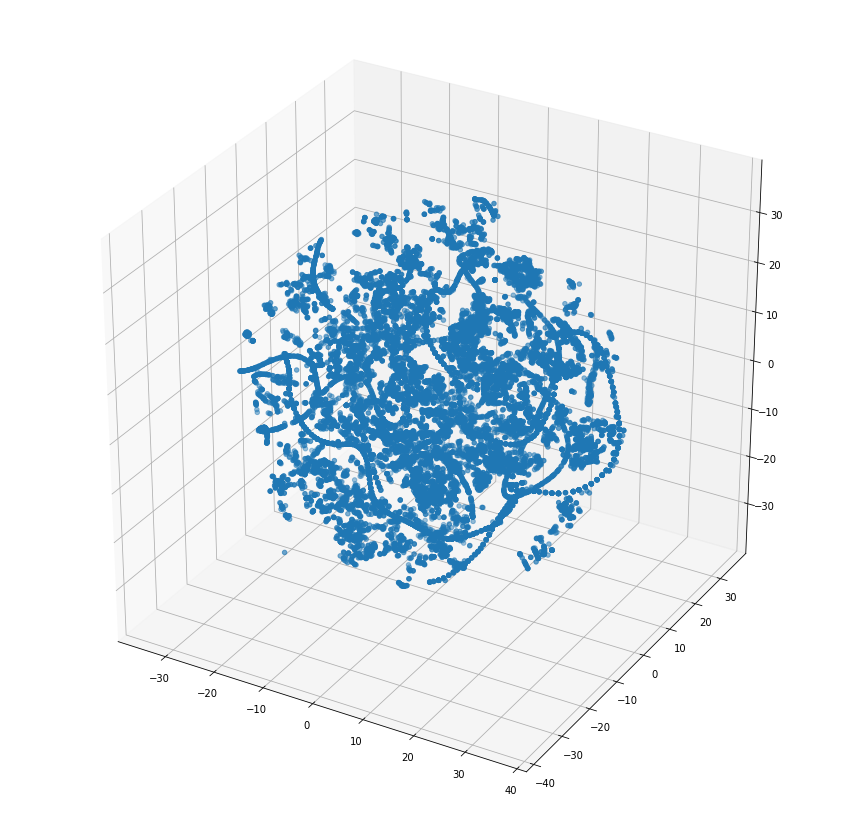

In [25]:
from mpl_toolkits.mplot3d import Axes3D
plt.rcParams['figure.figsize'] = [15, 15]

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(applications_history_tsne[:, 0],
        applications_history_tsne[:, 1],
        applications_history_tsne[:, 2])

In [26]:
from sklearn.cluster import KMeans

In [27]:
kmeans = KMeans(n_clusters=40, max_iter=10000, random_state=1)

In [28]:
%%time

kmeans_train = kmeans.fit_predict(df_applications_history_scale)

Wall time: 10min 43s


In [29]:
kmeans_train

array([ 6,  0, 27, ..., 11, 27, 27])

In [94]:
df_applications_history_result = pd.DataFrame(pd.get_dummies(kmeans_train, prefix='applications_history'))
df_applications_history_result_columns = df_applications_history_result.columns
df_applications_history_result['APPLICATION_NUMBER'] = df_applications_history['APPLICATION_NUMBER']

In [95]:
df_applications_history_result = pd.pivot_table(df_applications_history_result, values=df_applications_history_result_columns, index=['APPLICATION_NUMBER'], aggfunc=np.sum)

In [96]:
df_applications_history_result.head()

,applications_history_0,applications_history_1,applications_history_10,applications_history_11,applications_history_12,applications_history_13,applications_history_14,applications_history_15,applications_history_16,applications_history_17,applications_history_18,applications_history_19,applications_history_2,...,applications_history_33,applications_history_34,applications_history_35,applications_history_36,applications_history_37,applications_history_38,applications_history_39,applications_history_4,applications_history_5,applications_history_6,applications_history_7,applications_history_8,applications_history_9
APPLICATION_NUMBER,,,,,,,,,,,,,,,,,,,,,,,,,,,
123426833.0,875.0,1127.0,307.0,1065.0,35,364.0,419.0,3,18,35,2,40,3117.0,...,461.0,15,8,4,0,261.0,3,77,881.0,1395.0,238,902.0,1
123426834.0,0.0,0.0,0.0,0.0,0,0.0,0.0,0,0,0,0,0,0.0,...,0.0,0,0,0,0,0.0,0,0,0.0,0.0,0,0.0,0
123426835.0,3.0,0.0,0.0,0.0,0,0.0,2.0,0,0,0,0,0,10.0,...,0.0,0,0,0,0,0.0,0,0,0.0,0.0,1,0.0,0
123426836.0,1.0,0.0,0.0,1.0,0,0.0,0.0,0,0,0,0,0,6.0,...,1.0,0,0,0,0,0.0,0,0,0.0,0.0,0,0.0,0
123426837.0,0.0,0.0,0.0,0.0,0,0.0,0.0,0,0,0,0,0,0.0,...,0.0,0,0,0,0,0.0,0,1,0.0,0.0,0,0.0,0


# данные БКИ о предыдущих кредитах клиента;
df_bki

In [32]:
df_bki.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 945234 entries, 0 to 945233
Data columns (total 17 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   APPLICATION_NUMBER      945234 non-null  int64  
 1   BUREAU_ID               945234 non-null  int64  
 2   CREDIT_ACTIVE           945234 non-null  object 
 3   CREDIT_CURRENCY         945234 non-null  object 
 4   DAYS_CREDIT             945234 non-null  float64
 5   CREDIT_DAY_OVERDUE      945234 non-null  int64  
 6   DAYS_CREDIT_ENDDATE     886797 non-null  float64
 7   DAYS_ENDDATE_FACT       596274 non-null  float64
 8   AMT_CREDIT_MAX_OVERDUE  326557 non-null  float64
 9   CNT_CREDIT_PROLONG      945234 non-null  int64  
 10  AMT_CREDIT_SUM          945229 non-null  float64
 11  AMT_CREDIT_SUM_DEBT     803483 non-null  float64
 12  AMT_CREDIT_SUM_LIMIT    619267 non-null  float64
 13  AMT_CREDIT_SUM_OVERDUE  945234 non-null  float64
 14  CREDIT_TYPE         

In [33]:
df_bki = numeric_preprocessing(df_bki)
df_bki = create_dummie(df_bki)

feature CREDIT_TYPE
сategorical values ['Consumer credit' 'Credit card' 'Car loan' 'Mortgage'
 'Loan for business development' 'Microloan'
 'Loan for working capital replenishment' 'Unknown type of loan'
 'Loan for the purchase of equipment' 'Another type of loan'
 'Cash loan (non-earmarked)' 'Real estate loan' 'Mobile operator loan'
 'Loan for purchase of shares (margin lending)']
    dummie feature name: CREDIT_TYPE_Consumer credit
    dummie feature name: CREDIT_TYPE_Credit card
    dummie feature name: CREDIT_TYPE_Car loan
    dummie feature name: CREDIT_TYPE_Mortgage
    dummie feature name: CREDIT_TYPE_Loan for business development
    dummie feature name: CREDIT_TYPE_Microloan
    dummie feature name: CREDIT_TYPE_Loan for working capital replenishment
    dummie feature name: CREDIT_TYPE_Unknown type of loan
    dummie feature name: CREDIT_TYPE_Loan for the purchase of equipment
    dummie feature name: CREDIT_TYPE_Another type of loan
    dummie feature name: CREDIT_TYPE_Cash l

In [143]:
df_bki = df_bki.fillna(0)

In [144]:
df_bki.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 945234 entries, 0 to 945233
Data columns (total 36 columns):
 #   Column                                                    Non-Null Count   Dtype  
---  ------                                                    --------------   -----  
 0   APPLICATION_NUMBER                                        945234 non-null  float64
 1   BUREAU_ID                                                 945234 non-null  float64
 2   DAYS_CREDIT                                               945234 non-null  float64
 3   CREDIT_DAY_OVERDUE                                        945234 non-null  float64
 4   DAYS_CREDIT_ENDDATE                                       945234 non-null  float64
 5   DAYS_ENDDATE_FACT                                         945234 non-null  float64
 6   AMT_CREDIT_MAX_OVERDUE                                    945234 non-null  float64
 7   CNT_CREDIT_PROLONG                                        945234 non-null  float64
 8   AMT_

In [145]:
df_bki_scale = pd.DataFrame(standard_scaler.fit_transform(df_bki), 
               columns=df_bki.columns)

In [146]:
df_bki_scale.drop(['APPLICATION_NUMBER', 'BUREAU_ID'], axis='columns', inplace=True)

In [147]:
kmeans_bki = KMeans(n_clusters=30, max_iter=10000, random_state=1)

In [148]:
%%time

kmeans_train_bki = kmeans_bki.fit_predict(df_bki_scale)

Wall time: 2min 55s


In [149]:
df_bki_result = pd.DataFrame(pd.get_dummies(kmeans_train_bki, prefix='bki'))
df_bki_result_columns = df_bki_result.columns
df_bki_result['APPLICATION_NUMBER'] = df_bki['APPLICATION_NUMBER']

In [150]:
df_bki_result = pd.pivot_table(df_bki_result, values=df_bki_result_columns, index=['APPLICATION_NUMBER'], aggfunc=np.sum)

# история платежей клиента;
df_payments

In [85]:
df_payments.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1023932 entries, 0 to 1023931
Data columns (total 8 columns):
 #   Column                   Non-Null Count    Dtype  
---  ------                   --------------    -----  
 0   PREV_APPLICATION_NUMBER  1023932 non-null  float64
 1   APPLICATION_NUMBER       1023932 non-null  float64
 2   NUM_INSTALMENT_VERSION   1023932 non-null  float64
 3   NUM_INSTALMENT_NUMBER    1023932 non-null  float64
 4   DAYS_INSTALMENT          1023932 non-null  float64
 5   DAYS_ENTRY_PAYMENT       1023932 non-null  float64
 6   AMT_INSTALMENT           1023932 non-null  float64
 7   AMT_PAYMENT              1023932 non-null  float64
dtypes: float64(8)
memory usage: 62.5 MB


In [86]:
df_payments = numeric_preprocessing(df_payments)
#df_payments = create_dummie(df_payments)

In [87]:
df_payments = df_payments.fillna(0)

In [88]:
df_payments_scale = pd.DataFrame(standard_scaler.fit_transform(df_payments), 
               columns=df_payments.columns)

df_payments_scale.drop(['APPLICATION_NUMBER', 'PREV_APPLICATION_NUMBER'], axis='columns', inplace=True)

In [89]:
kmeans_payments = KMeans(n_clusters=10, max_iter=10000, random_state=1)

In [90]:
%%time

kmeans_train_payments = kmeans_payments.fit_predict(df_payments_scale)

Wall time: 52.9 s


In [91]:
df_payments_result = pd.DataFrame(pd.get_dummies(kmeans_train_payments, prefix='payments'))
df_payments_result_columns = df_payments_result.columns
df_payments_result['APPLICATION_NUMBER'] = df_payments['APPLICATION_NUMBER']

In [92]:
df_payments_result = pd.pivot_table(df_payments_result, values=df_payments_result_columns, index=['APPLICATION_NUMBER'], aggfunc=np.sum)

# клиентский профиль, некоторые знания, которые есть у компании о клиенте;
df_client_profile

In [48]:
df_client_profile.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 250000 entries, 0 to 249999
Data columns (total 24 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   APPLICATION_NUMBER          250000 non-null  int64  
 1   GENDER                      250000 non-null  object 
 2   CHILDRENS                   250000 non-null  int64  
 3   TOTAL_SALARY                250000 non-null  float64
 4   AMOUNT_CREDIT               250000 non-null  float64
 5   AMOUNT_ANNUITY              249989 non-null  float64
 6   EDUCATION_LEVEL             250000 non-null  object 
 7   FAMILY_STATUS               250000 non-null  object 
 8   REGION_POPULATION           250000 non-null  float64
 9   AGE                         250000 non-null  int64  
 10  DAYS_ON_LAST_JOB            250000 non-null  int64  
 11  OWN_CAR_AGE                 85041 non-null   float64
 12  FLAG_PHONE                  250000 non-null  int64  
 13  FLAG_EMAIL    

In [49]:
df_client_profile = numeric_preprocessing(df_client_profile)

In [50]:
df_client_profile['GENDER'].value_counts()

F      164645
M       85351
XNA         4
Name: GENDER, dtype: int64

In [51]:
df_client_profile['GENDER'] = (df_client_profile['GENDER'] == 'F').astype(int)

In [52]:
df_client_profile = create_dummie(df_client_profile)

feature FAMILY_STATUS
сategorical values ['Civil marriage' 'Married' 'Widow' 'Single / not married' 'Separated'
 'Unknown']
    dummie feature name: FAMILY_STATUS_Civil marriage
    dummie feature name: FAMILY_STATUS_Married
    dummie feature name: FAMILY_STATUS_Widow
    dummie feature name: FAMILY_STATUS_Single / not married
    dummie feature name: FAMILY_STATUS_Separated
    dummie feature name: FAMILY_STATUS_Unknown
feature EDUCATION_LEVEL
сategorical values ['Incomplete higher' 'Secondary / secondary special' 'Lower secondary'
 'Higher education' 'Academic degree']
    dummie feature name: EDUCATION_LEVEL_Incomplete higher
    dummie feature name: EDUCATION_LEVEL_Secondary / secondary special
    dummie feature name: EDUCATION_LEVEL_Lower secondary
    dummie feature name: EDUCATION_LEVEL_Higher education
    dummie feature name: EDUCATION_LEVEL_Academic degree
count of data (250000, 33)


In [65]:
df_client_profile = df_client_profile.fillna(0)

In [66]:
df_client_profile.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 250000 entries, 0 to 249999
Data columns (total 33 columns):
 #   Column                                         Non-Null Count   Dtype  
---  ------                                         --------------   -----  
 0   APPLICATION_NUMBER                             250000 non-null  float64
 1   GENDER                                         250000 non-null  int32  
 2   CHILDRENS                                      250000 non-null  float64
 3   TOTAL_SALARY                                   250000 non-null  float64
 4   AMOUNT_CREDIT                                  250000 non-null  float64
 5   AMOUNT_ANNUITY                                 250000 non-null  float64
 6   REGION_POPULATION                              250000 non-null  float64
 7   AGE                                            250000 non-null  float64
 8   DAYS_ON_LAST_JOB                               250000 non-null  float64
 9   OWN_CAR_AGE                          

# Объединение

In [151]:
df_train = pd.read_csv(
    "geekbrains-competitive-data-analysis/train.csv"
)

In [152]:
df_train = df_train.merge(df_client_profile, left_on='APPLICATION_NUMBER', right_on='APPLICATION_NUMBER', how='left')

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\reshape\merge.py:1108: UserWarning: You are merging on int and float columns where the float values are not equal to their int representation
  UserWarning,


In [154]:
df_train = df_train.merge(df_applications_history_result, left_on='APPLICATION_NUMBER', right_on='APPLICATION_NUMBER', how='left')

In [155]:
df_train = df_train.merge(df_bki_result, left_on='APPLICATION_NUMBER', right_on='APPLICATION_NUMBER', how='left')

In [156]:
df_train = df_train.merge(df_payments_result, left_on='APPLICATION_NUMBER', right_on='APPLICATION_NUMBER', how='left')

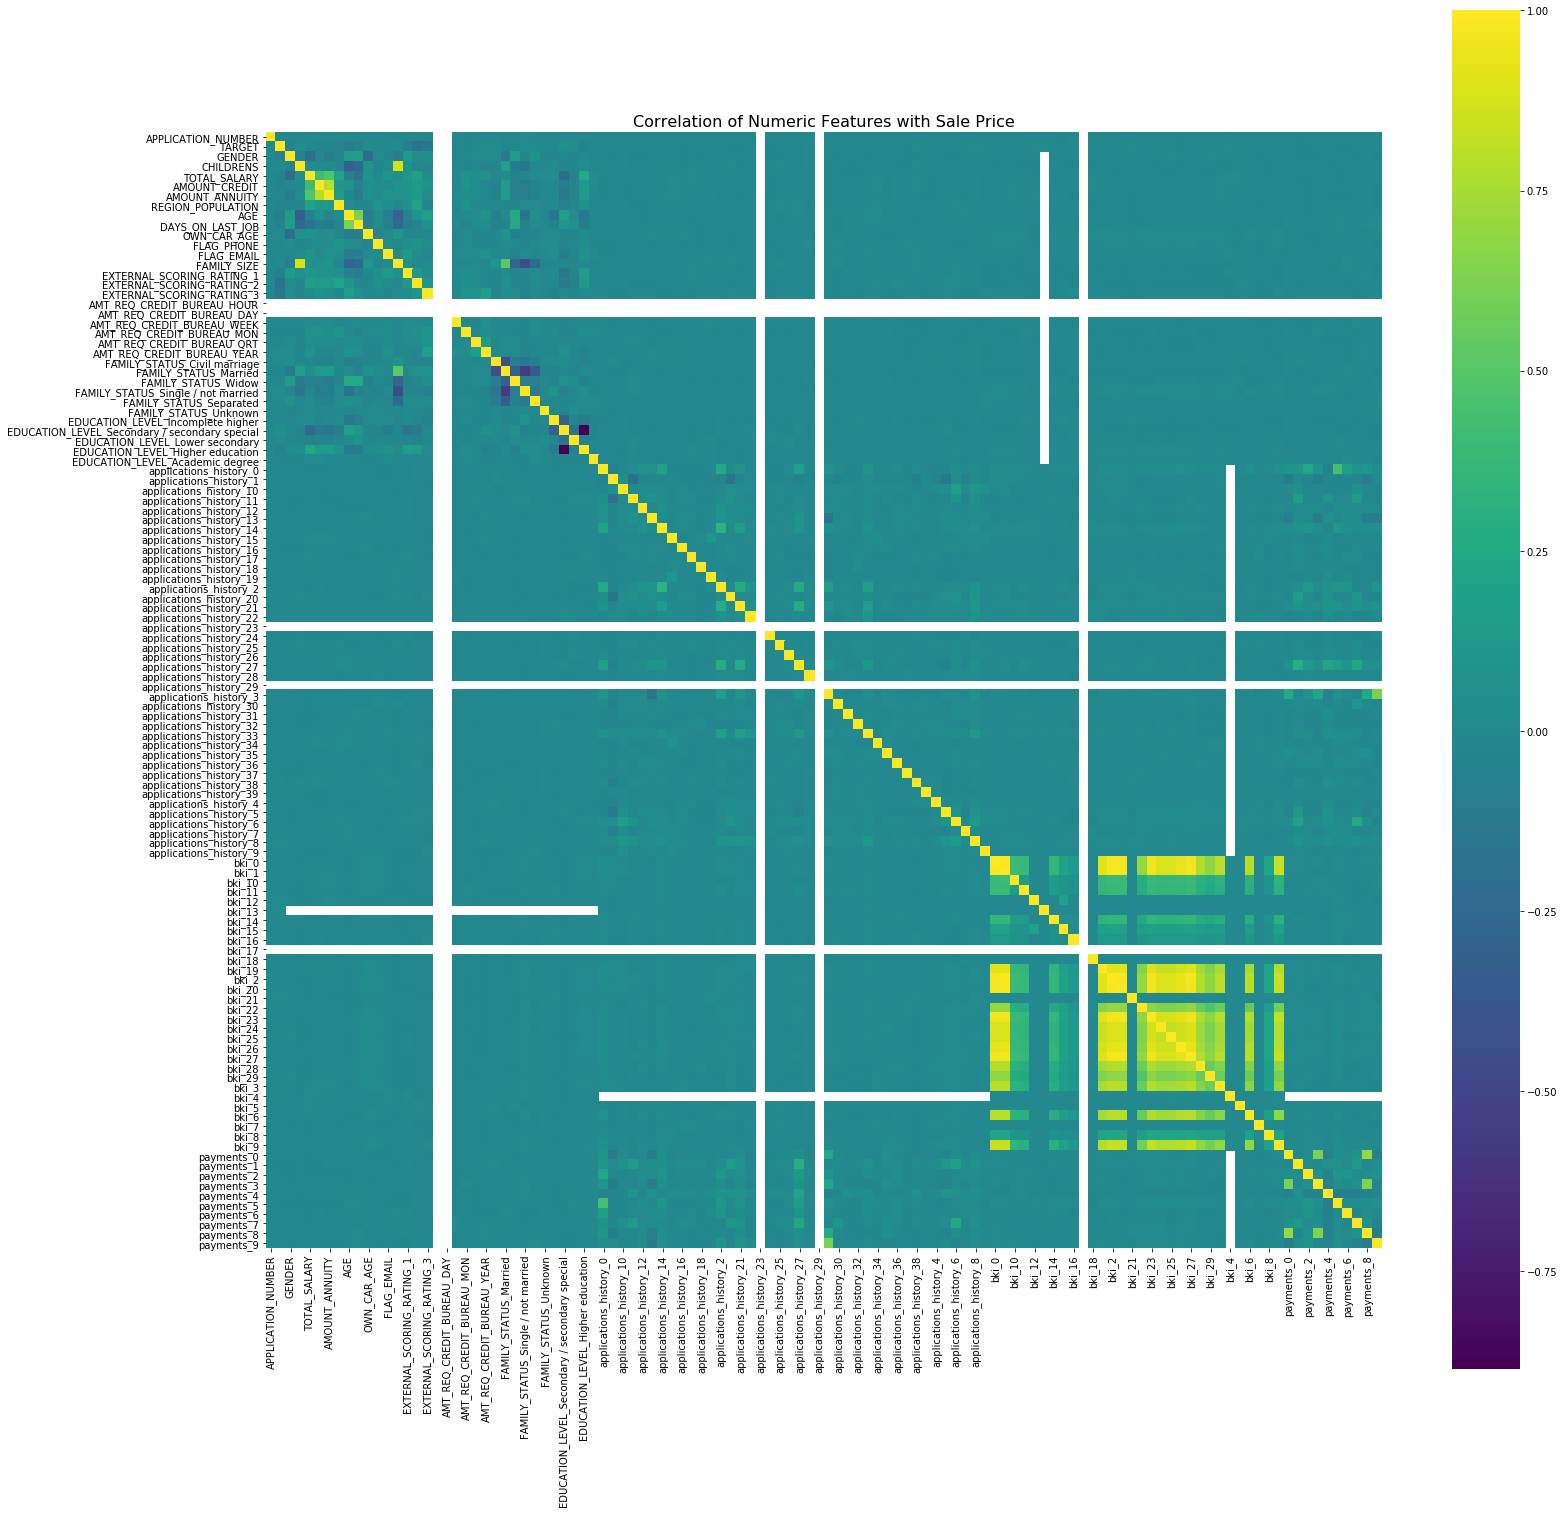

In [157]:
cor = df_train.corr()
fig, axes = plt.subplots(figsize = (25,25))
plt.title("Correlation of Numeric Features with Sale Price", y=1, size=16)
sns.heatmap(cor, square=True, vmax=1, cmap="viridis")

In [158]:
df_test = pd.read_csv(
    "geekbrains-competitive-data-analysis/test.csv"
)

In [159]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 165141 entries, 0 to 165140
Data columns (total 2 columns):
 #   Column              Non-Null Count   Dtype 
---  ------              --------------   ----- 
 0   APPLICATION_NUMBER  165141 non-null  int64 
 1   NAME_CONTRACT_TYPE  165141 non-null  object
dtypes: int64(1), object(1)
memory usage: 2.5+ MB
